***Mathematical Methods for Engineers (MathEng)***

**EXAM**

**December 2021**
```
Duration: 2 hrs, all documents and calculators permitted
ATTEMPT ALL QUESTIONS – ANSWER IN ENGLISH
```

# Determine an expression for the complex Fourier series of the periodic sawtooth waveform illustrated in Figure Q1.

<img src=images/Figure-Q1.png width='30%' height='30%' > </img>

\includegraphics[width=0.3\textwidth]{images/Figure-Q1.png}

[6 marks]

In [1]:
using FFTW, LinearAlgebra, Plots, LaTeXStrings

In [2]:
include("../modules/operations.jl");

In [3]:
# Define the Fourier coefficients C_k
function C_k(k)
    if k == 0
        return 0.0  # C_0 is zero for the sawtooth signal
    else
        return (j * π * k * (ℯ^(2j * π * k) + 1) - (ℯ^(2j * π * k) - 1)) / (2π * k^2) * ℯ^(-j * π * k)
    end
end

# Define the Fourier series reconstruction
function sawtooth_reconstruction(t, N)
    ∑(real(C_k(k) * ℯ^(j * k * t)) for k in -N:N)
end

# Original sawtooth function
function sawtooth_original(t)
    t
end

sawtooth_original (generic function with 1 method)

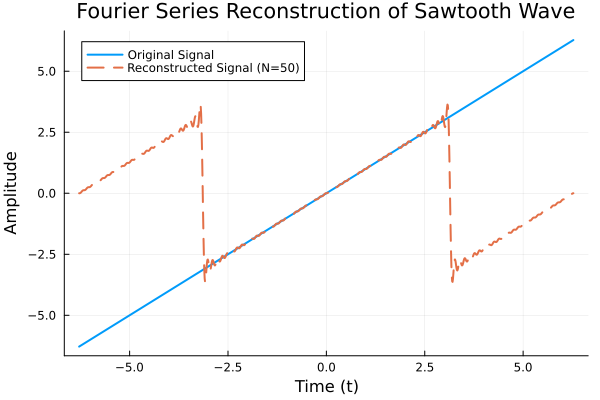

In [5]:
# Time range for visualization
T = 2π  # Period
t = -T:0.01:T  # Time values for one period

# Number of terms in Fourier series
N = 50  # Adjust for higher accuracy

# Plot the original and reconstructed signals

# Original signal
plot(t, [sawtooth_original(tᵢ) for tᵢ in t]
    , label="Original Signal", lw=2
    , title = "Fourier Series Reconstruction of Sawtooth Wave"
    , xlabel = "Time (t)", ylabel = "Amplitude"
)
# Reconstructed signal
plot!(t, [sawtooth_reconstruction(tᵢ, N) for tᵢ in t] 
    , label="Reconstructed Signal (N=$N)", lw=2, linestyle=:dash
)